In [21]:
import cv2
import torch

from face_ssd_infer import SSD
from utils import vis_detections
from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
wavelength_map = {
    (0, 4): '975',
    (0, 3): '960',
    (0, 2): '945',
    (0, 1): '930',
    (0, 0): '915',
    (1, 4): '900',
    (1, 3): '890',
    (1, 2): '875',
    (1, 1): '850',
    (1, 0): '835',
    (2, 4): '820',
    (2, 3): '805',
    (2, 2): '790',
    (2, 1): '775',
    (2, 0): '760',
    (3, 4): '745',
    (3, 3): '730',
    (3, 2): '715',
    (3, 1): '700',
    (3, 0): '675',
    (4, 4): '660',
    (4, 3): '645',
    (4, 2): '630',
    (4, 1): '615',
    (4, 0): '600'
}

In [2]:
device = torch.device("cpu")
conf_thresh = 0.3
target_size = (800, 800)


net = SSD("test")
net.load_state_dict(torch.load('weights/WIDERFace_DSFD_RES152.pth', map_location='cpu'))
net.to(device).eval();

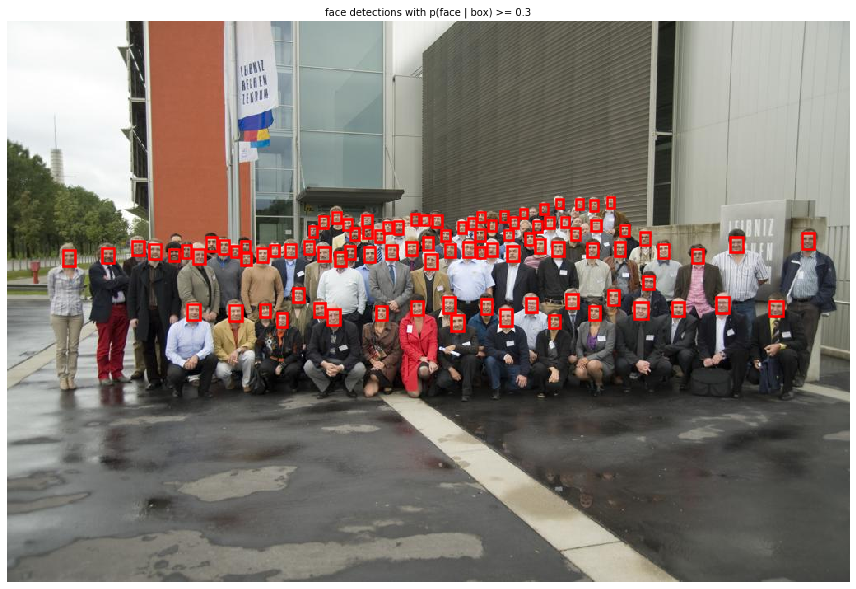

In [3]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

detections = net.detect_on_image(img, target_size, device, is_pad=False, keep_thresh=conf_thresh)
vis_detections(img, detections, conf_thresh, show_text=False)

In [37]:
multi_img = cv2.imread("C:/Multispectral Data/6-12-2019/001_files/010120.tif", cv2.COLOR_BGR2GRAY)


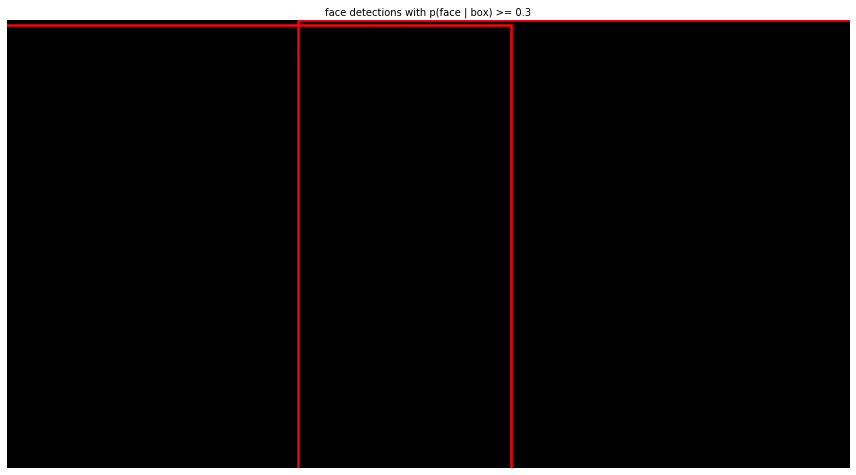

In [16]:
detections = net.detect_on_image(multi_img, target_size, device, is_pad=False, keep_thresh=conf_thresh)
vis_detections(multi_img, detections, conf_thresh, show_text=False)

In [38]:
for j in wavelength_map.keys():
    rr = multi_img[j[0]::5,j[1]::5]

In [39]:
rr.shape

(217, 410)

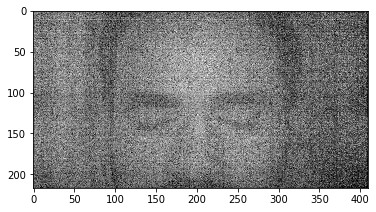

In [40]:
plt.imshow(rr, cmap='gray')

In [28]:
multi_img.mean()

13.523654713350183